# Copy_EC_Files

In [4]:
import os
import shutil

# Paths (double-check before running!)
src = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\edf_dataset"
dst =  r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder"

# Make sure destination exists
if not os.path.exists(dst):
    os.makedirs(dst)

# Go through files and pick only those ending with 'EC.edf'
for file in os.listdir(src):
    if file.endswith("EC.edf"):
        try:
            shutil.copy2(os.path.join(src, file), os.path.join(dst, file))
            print(f"Copied: {file}")
        except Exception as e:
            print(f"Failed to copy {file}: {e}")

print("Done copying all EC.edf files (if any).")

Copied: H S1 EC.edf
Copied: H S10 EC.edf
Copied: H S11 EC.edf
Copied: H S13 EC.edf
Copied: H S14 EC.edf
Copied: H S15 EC.edf
Copied: H S16 EC.edf
Copied: H S17 EC.edf
Copied: H S19 EC.edf
Copied: H S2 EC.edf
Copied: H S20 EC.edf
Copied: H S21 EC.edf
Copied: H S22 EC.edf
Copied: H S23 EC.edf
Copied: H S24 EC.edf
Copied: H S25 EC.edf
Copied: H S26 EC.edf
Copied: H S27 EC.edf
Copied: H S28 EC.edf
Copied: H S29 EC.edf
Copied: H S3 EC.edf
Copied: H S30 EC.edf
Copied: H S4 EC.edf
Copied: H S5 EC.edf
Copied: H S6 EC.edf
Copied: H S7 EC.edf
Copied: H S8 EC.edf
Copied: H S9 EC.edf
Copied: MDD S1 EC.edf
Copied: MDD S10 EC.edf
Copied: MDD S11  EC.edf
Copied: MDD S13 EC.edf
Copied: MDD S14 EC.edf
Copied: MDD S15 EC.edf
Copied: MDD S17 EC.edf
Copied: MDD S18 EC.edf
Copied: MDD S19 EC.edf
Copied: MDD S2  EC.edf
Copied: MDD S20 EC.edf
Copied: MDD S21 EC.edf
Copied: MDD S22 EC.edf
Copied: MDD S23 EC.edf
Copied: MDD S24  EC.edf
Copied: MDD S25 EC.edf
Copied: MDD S26 EC.edf
Copied: MDD S27 EC.edf
Copied

# EC EDF PLOT(random 5)

Plotting file: H S20 EC.edf
Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S20 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78591  =      0.000 ...   306.996 secs...
Using matplotlib as 2D backend.


Plotting file: MDD S29 EC.edf
Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\MDD S29 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


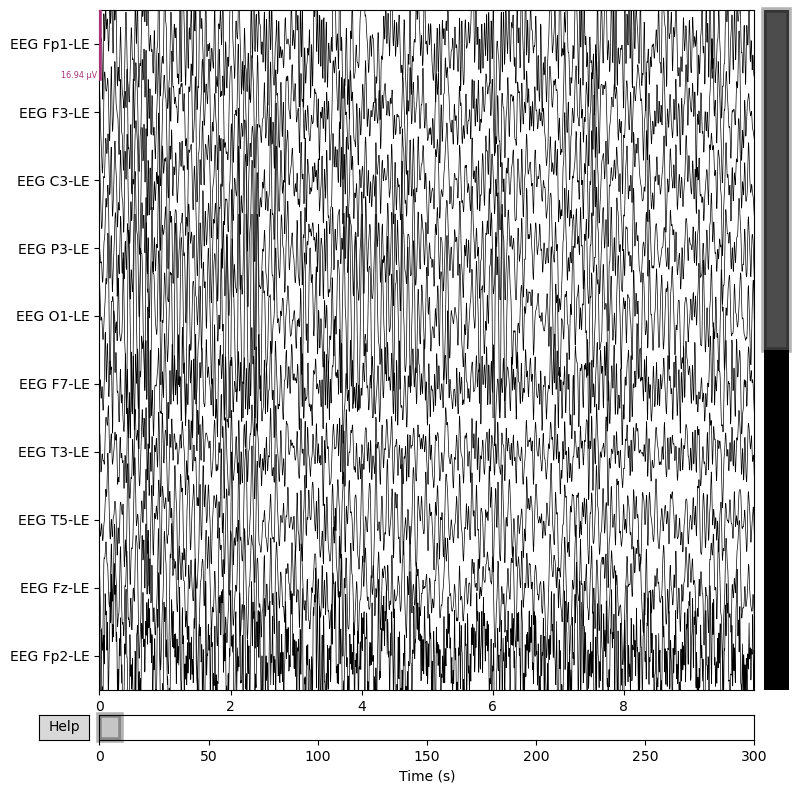

Plotting file: MDD S26 EC.edf
Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\MDD S26 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


Plotting file: MDD S19 EC.edf
Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\MDD S19 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...


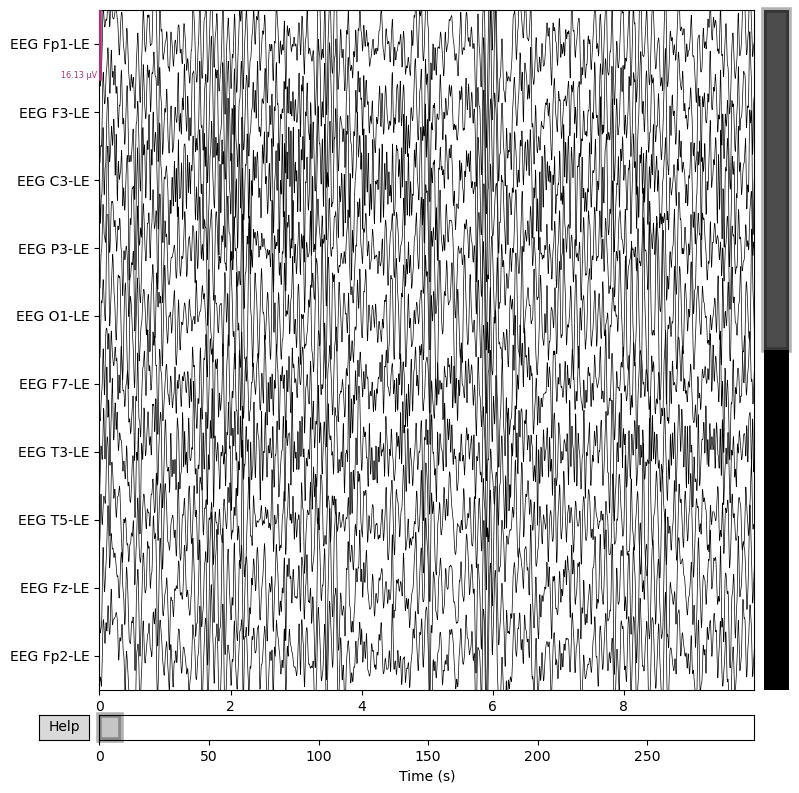

Plotting file: MDD S33 EC.edf
Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\MDD S33 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...


In [6]:
import mne
import matplotlib.pyplot as plt
import glob
import random
import os

# Path to folder containing your EO EDF files
folder_path = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder"

# Get all EDF files in folder
edf_files = glob.glob(os.path.join(folder_path, "*.edf"))

# Check if files exist
if not edf_files:
    print("No EDF files found in the given path.")
    exit()

# Pick 3 random EDF files (change number if needed)
random_files = random.sample(edf_files, min(5, len(edf_files)))

# Plot each selected EDF file
for file in random_files:
    print(f"Plotting file: {os.path.basename(file)}")
    raw = mne.io.read_raw_edf(file, preload=True)
    raw.plot(n_channels=10, scalings='auto', title=os.path.basename(file), show=True)

#  Inspect_EC_EDF_Channels

In [8]:

edf_path = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S1 EC.edf"

try:
    raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)
    print("Number of channel:", len(raw.ch_names))
    print("Channels:", raw.ch_names)
except Exception as e:
    print(f"Error loading {edf_path}: {e}")


Number of channel: 22
Channels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']


# Preprocess_EC_EDF_and_Run_ICA

Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Wind

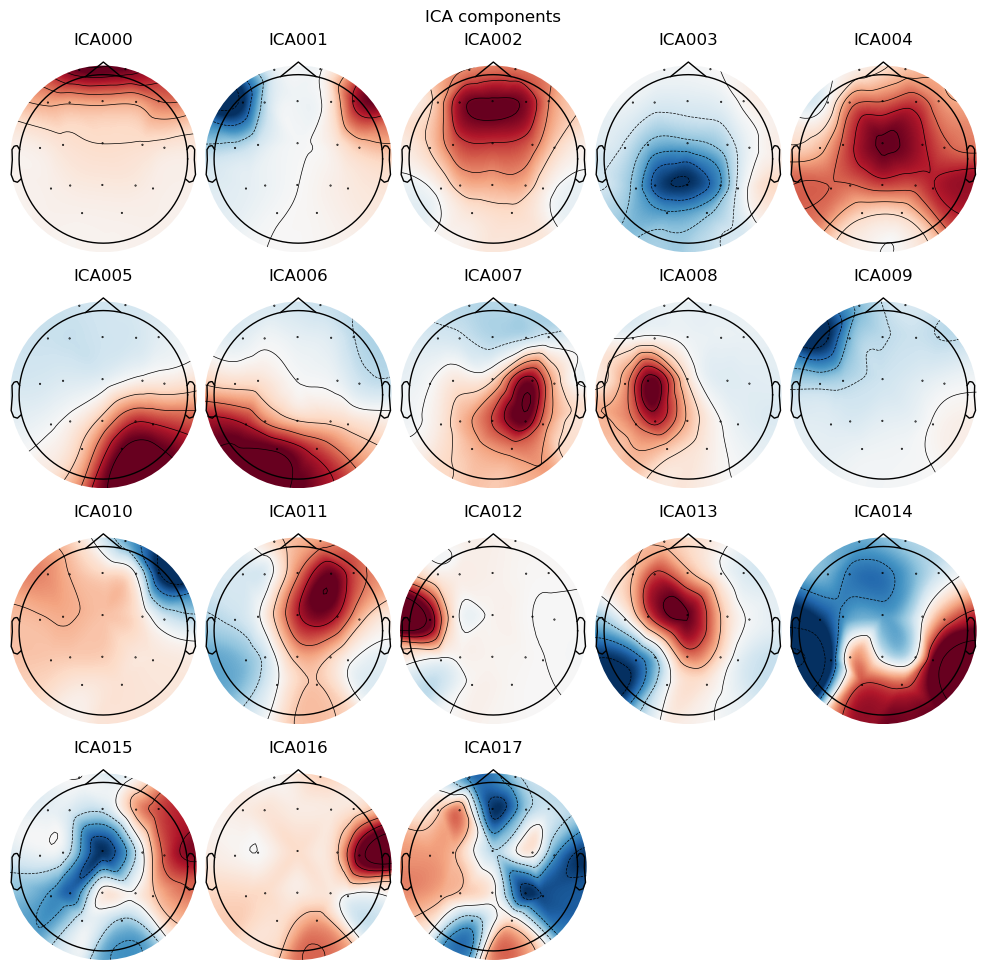

In [10]:
import mne
from mne.preprocessing import ICA

# Load file
edf_path = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S1 EC.edf"
raw = mne.io.read_raw_edf(edf_path, preload=True)

# Clean channel names
mapping = {ch: ch.replace("EEG ", "").replace("-LE", "")
           for ch in raw.ch_names if "EEG " in ch and "-LE" in ch}
raw.rename_channels(mapping)

# Drop channels not in standard 10-20 layout
std_chs = mne.channels.make_standard_montage('standard_1020').ch_names
raw.drop_channels([ch for ch in raw.ch_names if ch not in std_chs])

# Set montage
raw.set_montage('standard_1020', on_missing='warn')

# Filter & notch for ICA
raw.filter(1., 70., fir_design='firwin')  # 1 Hz high-pass for ICA stability
raw.notch_filter(50.)

# Run ICA
n_components = min(len(raw.ch_names) - 1, 20)  # safe choice
ica = ICA(n_components=n_components, random_state=42, max_iter='auto')
ica.fit(raw)

# Plot ICA components
ica.plot_components()

# APPLYING ICA(INDEPENDENT COMPONENT ANALYSIS) AND PLOTTING OF BEFORE AND AFTER ICA

Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S3 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 1691 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- W

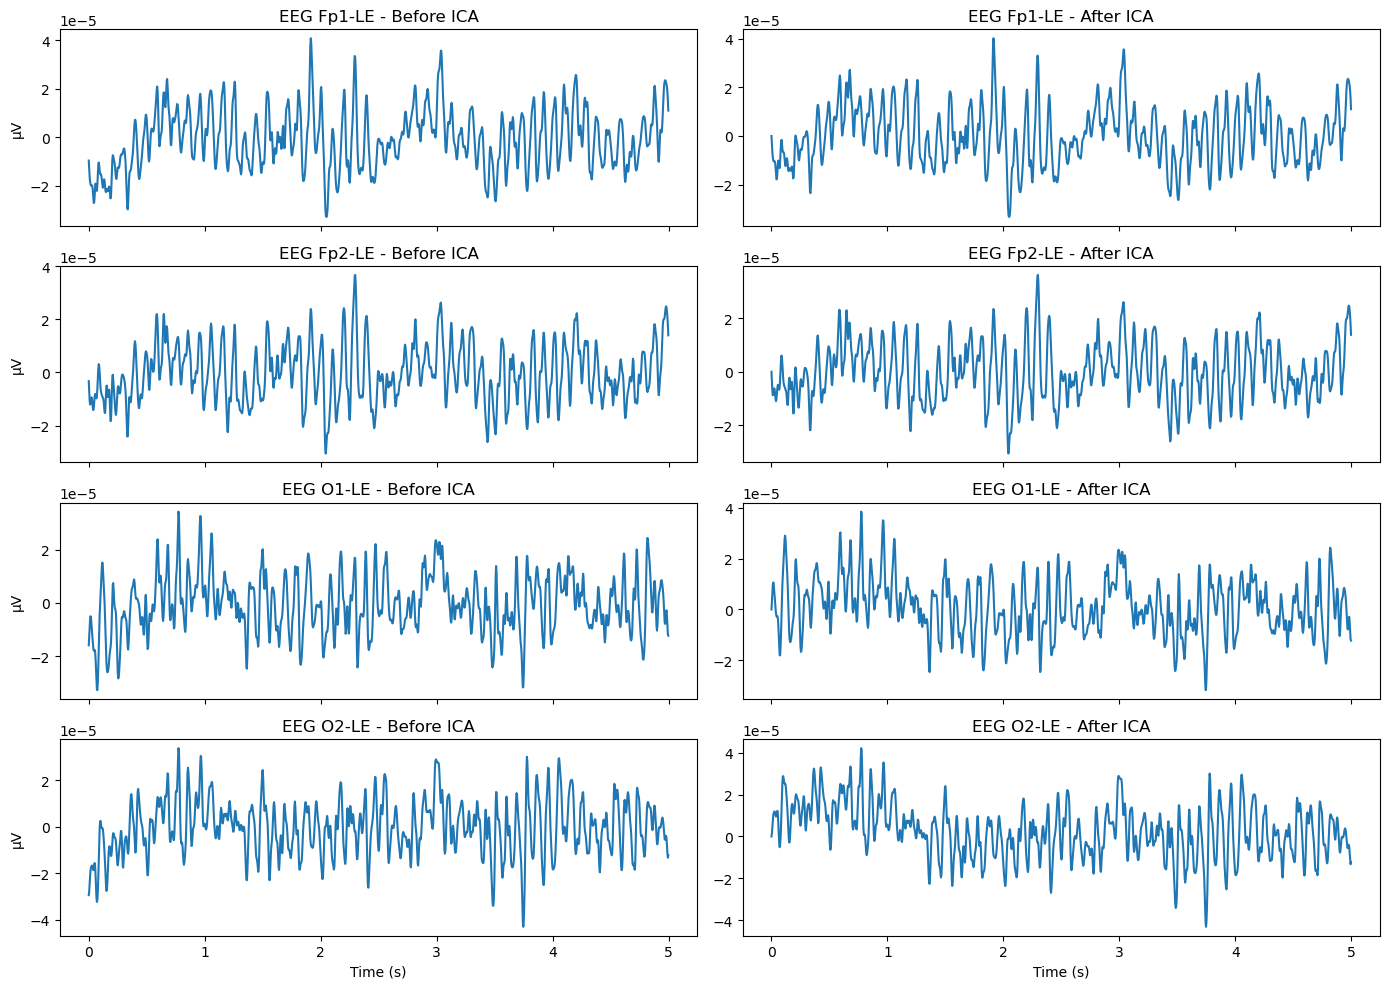

In [15]:

import matplotlib.pyplot as plt
# Path to the EEG file
edf_path = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S3 EC.edf"
raw = mne.io.read_raw_edf(edf_path, preload=True)

# Save a copy before clean it
raw_orig = raw.copy()

# Apply basic filters to remove unwanted noise
raw.filter(0.5, 70, fir_design='firwin')
raw.notch_filter(50)

# Run ICA to clean artifacts (like blinks, muscle activity etc.)
ica = mne.preprocessing.ICA(n_components=15, random_state=42, max_iter='auto')
ica.fit(raw)
raw_clean = ica.apply(raw.copy())

# Choose a few channels to see  effect
ch_names = ['EEG Fp1-LE', 'EEG Fp2-LE', 'EEG O1-LE', 'EEG O2-LE']
duration = 5  # how many seconds to plot
sfreq = raw.info['sfreq']
samples = int(duration * sfreq)
times = [i / sfreq for i in range(samples)]

# Set  plot
fig, axs = plt.subplots(len(ch_names), 2, figsize=(14, 10), sharex=True)

for i, ch in enumerate(ch_names):
    # Before cleaning
    data_before, _ = raw_orig.copy().pick_channels([ch])[:, :samples]
    axs[i, 0].plot(times, data_before.T)
    axs[i, 0].set_title(f'{ch} - Before ICA')

    # After cleaning
    data_after, _ = raw_clean.copy().pick_channels([ch])[:, :samples]
    axs[i, 1].plot(times, data_after.T)
    axs[i, 1].set_title(f'{ch} - After ICA')

    axs[i, 0].set_ylabel('µV')

# Add labels at the bottom row
axs[-1, 0].set_xlabel('Time (s)')
axs[-1, 1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()


# NORMALIZATION(Z_SCORE)

In [18]:

import numpy as np

edf_file = r'C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S6 EC.edf'
amp_thresh = 100e-6  # 100uV

raw = mne.io.read_raw_edf(edf_file, preload=True)
raw.pick_types(eeg=True)
raw.filter(1., 40.)

events = mne.make_fixed_length_events(raw, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2.0, baseline=None, preload=True)

clean = []
og_ep = None

for ep in epochs.get_data():
    if np.any(np.abs(ep) > amp_thresh):
        continue

    if og_ep is None:
        og_ep = ep.copy()

    ep_norm = (ep - ep.mean(axis=1, keepdims=True)) / ep.std(axis=1, keepdims=True)
    clean.append(ep_norm)

if clean:
    z_ep = clean[0]
    t = epochs.times

    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    axs[0].plot(t, og_ep[0], color='tab:blue')
    axs[0].set_title("original first chn")
    axs[0].set_ylabel("amp (V)")

    axs[1].plot(t, z_ep[0], color='tab:green')
    axs[1].set_title("after normlize")
    axs[1].set_xlabel("time")
    axs[1].set_ylabel("z-score")

    plt.tight_layout()
    plt.show()
else:
    print("nothing clean under thresh")


Extracting EDF parameters from C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\EC_folder\H S6 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Using data from 

# EC_EDF_FeatureExtraction_Config

In [30]:
import os
import numpy as np
import pandas as pd
import mne
from scipy.fft import fft

# --- Basic Settings ---
edf_folder = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\edf_dataset"
output_csv_path = r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv"
sfreq = 256
segment_duration = 5
amp_threshold = 100  # µV

# - EEG Channels to  
selected_channels = [
    'EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE',
    'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE',
    'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE',
    'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE'
]

#  Frequency Band 
bands = {
    'delta': (0.1, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta':  (13, 30),
    'gamma': (30, 100),
}

# --- Generate Column Headers ---
column_names = []
for ch in selected_channels:
    ch_name = ch.replace("EEG ", "").replace("-LE", "").replace("-", "_")
    for band in bands:
        column_names.append(f"{ch_name}_{band}")

# EEG Preprocessing 

In [ ]:

def preprocess_eeg(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
    raw.pick_channels(selected_channels)
    raw.filter(0.5, 70, fir_design='firwin', verbose=False)
    raw.notch_filter(50, verbose=False)

    ica = mne.preprocessing.ICA(n_components=19, random_state=42, max_iter='auto')
    ica.fit(raw)
    raw = ica.apply(raw)

    raw.set_eeg_reference('average', projection=False)
    return raw

#  FFT Band Power Extraction 

In [34]:

def extract_fft_features(segment, sfreq):
    n_channels, n_times = segment.shape
    freqs = np.fft.fftfreq(n_times, d=1/sfreq)
    pos_freqs = freqs > 0
    fft_vals = np.abs(fft(segment))[:, pos_freqs]
    freqs = freqs[pos_freqs]

    band_power = []
    for _, (low, high) in bands.items():
        band_mask = (freqs >= low) & (freqs < high)
        power = np.mean(fft_vals[:, band_mask], axis=1)
        band_power.append(power)

    return np.concatenate(band_power)

# Segmenting and Feature Collection 

In [38]:
# Segmenting and Feature Collection 
def extract_features_from_raw(raw):
    data = raw.get_data()
    segment_len = int(segment_duration * sfreq)
    n_channels, n_samples = data.shape
    n_segments = n_samples // segment_len

    features = []
    for i in range(n_segments):
        seg = data[:, i*segment_len : (i+1)*segment_len]
        if np.any(np.abs(seg) > amp_threshold):
            continue
        seg = (seg - np.mean(seg, axis=1, keepdims=True)) / np.std(seg, axis=1, keepdims=True)
        fft_feature = extract_fft_features(seg, sfreq)
        if fft_feature.shape[0] == len(column_names):
            features.append(fft_feature)

    return np.array(features)

# EC_EDF_FeatureExtraction_and_SaveCSV

In [40]:
all_data = []
labels = []
subject_ids = []
subject_count = 0

for file in os.listdir(edf_folder):
    if file.endswith("EC.edf"):
        file_path = os.path.join(edf_folder, file)
        print(f"Processing: {file}")

        try:
            raw = preprocess_eeg(file_path)
            features = extract_features_from_raw(raw)
        except Exception as e:
            print(f"Error processing {file}: {e}")
            continue

        if features.size == 0:
            continue

        label = 1 if "MDD" in file else 0
        all_data.extend(features)
        labels.extend([label] * len(features))
        subject_ids.extend([subject_count] * len(features))
        subject_count += 1

# Save
df = pd.DataFrame(all_data, columns=column_names)
df['label'] = labels
df['subject_id'] = subject_ids
df.to_csv(output_csv_path, index=False)
print(f"CSV saved at: {output_csv_path}")

Processing: H S1 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 10.1s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Processing: H S10 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 11.2s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Processing: H S15 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 7.3s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Processing: H S16 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 8.5s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG'

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Processing: H S27 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 13.6s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Processing: H S28 EC.edf
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG

# CLASS DISTRIBUTION

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
df = pd.read_csv( r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv")
# Count labels
label_counts = df['label'].value_counts()
print("Class Distribution:\n", label_counts)

# Plot the class distribution
plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values, color=['green', 'red'])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in CSV Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Class Distribution:
 label
1    1755
0    1705
Name: count, dtype: int64


# FOR SUBJECT DEPENDENT FEATURES

In [11]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv( r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv")
# Prepare features and labels
X = df.drop(columns=['label', 'subject_id'])
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_ranks.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Most Important EEG Features (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Print top N features
top_features = feature_ranks.head(20)
print("\nTop 20 EEG features:\n", top_features)



C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 20 EEG features:
 P4_alpha     0.162530
C4_gamma     0.103400
T6_alpha     0.080640
O2_beta      0.039227
Pz_beta      0.036746
P3_alpha     0.026873
T5_delta     0.023790
C3_delta     0.019021
F8_theta     0.018985
O2_gamma     0.017730
O2_delta     0.015874
Fp2_delta    0.015075
Fp1_gamma    0.015059
T5_alpha     0.015019
T6_beta      0.014609
F8_gamma     0.014110
T6_delta     0.013967
T4_alpha     0.013618
Cz_theta     0.013578
C4_beta      0.013352
dtype: float32


# MODELS EVALUATION AND VISUALIZATIONS

In [1]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_final_model(model, X_test, y_test, model_name="Final Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\n{model_name} Results")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    if y_proba is not None:
        print(f"ROC AUC   : {roc_auc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} - ROC Curve")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return acc, prec, rec, f1, roc_auc

def show_performance(model, X_test, y_test, train_accuracies, val_accuracies):
    print("\nPerformance Summary")
    print("-------------------")
    print(f"Average training accuracy:   {np.mean(train_accuracies):.3f}")
    print(f"Average validation accuracy: {np.mean(val_accuracies):.3f}")

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy:               {acc:.3f}")

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]

# EC_Dataset_Load_and_TrainValTest_Split

In [3]:

import pandas as pd
import numpy as np

# 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# hmm... for plotting things nicely
import matplotlib.pyplot as plt
import seaborn as sns

# so, read the dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv")

# ok now pick the features we want to keep, top 20 based on EEG analysis
features_we_keep = [
    "P4_alpha", "C4_gamma", "T6_alpha", "O2_beta",
    "Pz_beta", "P3_alpha", "T5_delta", "C3_delta",
    "F8_theta", "O2_gamma", "O2_delta", "Fp2_delta",
    "Fp1_gamma", "T5_alpha", "T6_beta", "F8_gamma",
    "T6_delta", "T4_alpha", "Cz_theta", "C4_beta"
]

# Create feature matrix X and label vector y
X = df[features_we_keep].values
y = df['label'].values  # Usually: 0 = not depressed, 1 = depressed

# Step 1: Split into temporary (train+val) and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split temp into final train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# USING XGBOOST CLASSIFIER

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:04:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train acc: 0.9976
Val acc: 0.961
Test acc: 0.9624

Final Model Results
Accuracy  : 0.9624
Precision : 0.9603
Recall    : 0.9658
F1 Score  : 0.9631
ROC AUC   : 0.9886


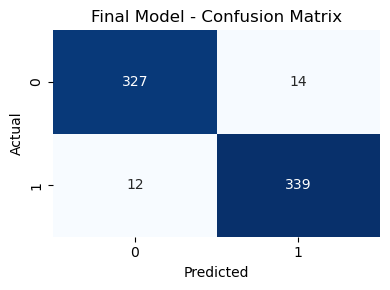

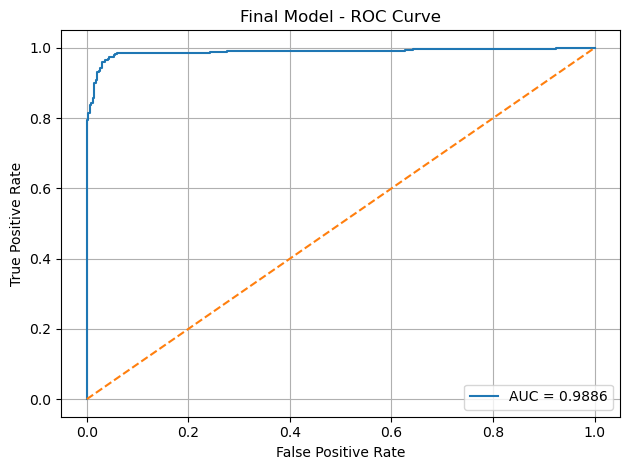

(0.9624277456647399,
 0.9603399433427762,
 0.9658119658119658,
 0.9630681818181818,
 0.9886290531451821)

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# model init, whatever params seemed to work okay
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# predictions – let's see how much it learned
preds_train = model.predict(X_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)

# basic accuracy numbers
train_acc = accuracy_score(y_train, preds_train)
val_acc = accuracy_score(y_val, preds_val)
test_acc = accuracy_score(y_test, preds_test)

print("Train acc:", round(train_acc, 4))
print("Val acc:", round(val_acc, 4))
print("Test acc:", round(test_acc, 4))

evaluate_final_model(model, X_test, y_test, model_name="Final Model")

# USING LOGISTIC REGRESSION

Logistic Regression Results:
Train Accuracy     : 0.9354527938342967
Validation Accuracy: 0.9205202312138728
Test Accuracy      : 0.9046242774566474

Final Model Results
Accuracy  : 0.9046
Precision : 0.9155
Recall    : 0.8946
F1 Score  : 0.9049
ROC AUC   : 0.9609


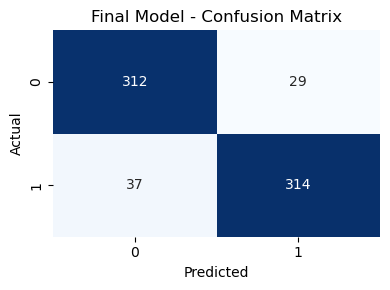

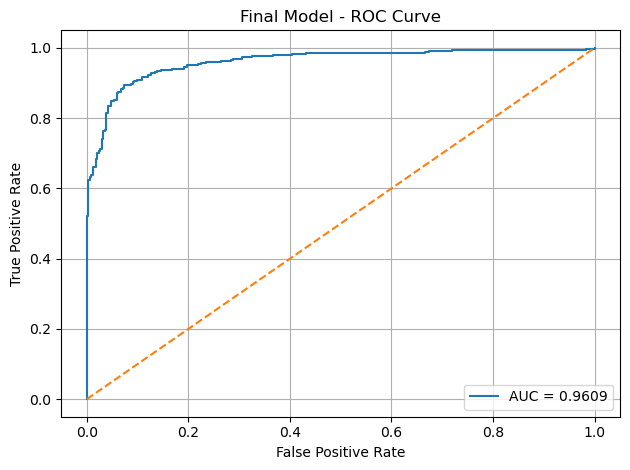

(0.9046242774566474,
 0.9154518950437318,
 0.8945868945868946,
 0.9048991354466859,
 0.9609410899733482)

In [67]:
# now trying logistic regression — simple and often effective
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# train it on the training data
logreg.fit(X_train, y_train)

# make predictions
train_preds = logreg.predict(X_train)
val_preds = logreg.predict(X_val)
test_preds = logreg.predict(X_test)
print("Logistic Regression Results:")
print("Train Accuracy     :", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Test Accuracy      :", accuracy_score(y_test, test_preds))
evaluate_final_model(logreg, X_test, y_test, model_name="Final Model")

# USING RANDOM FOREST CLASSIFIER

Random Forest Results:
Train Accuracy     : 0.9889210019267822
Validation Accuracy: 0.9566473988439307
Test Accuracy      : 0.953757225433526

Final Model Results
Accuracy  : 0.9538
Precision : 0.9570
Recall    : 0.9516
F1 Score  : 0.9543
ROC AUC   : 0.9875


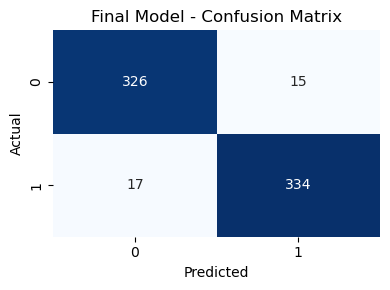

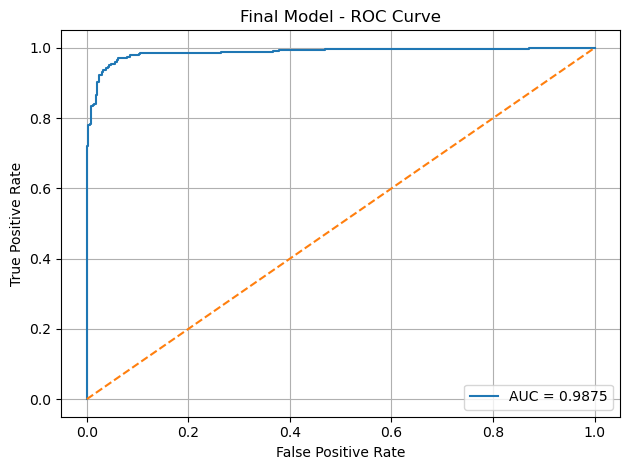

(0.953757225433526,
 0.9570200573065902,
 0.9515669515669516,
 0.9542857142857143,
 0.9874510197090843)

In [71]:
# bringing in Random Forest 
from sklearn.ensemble import RandomForestClassifier

# initialize the model —
rf = RandomForestClassifier( n_estimators=100,
    max_depth=6,
    random_state=42)

# train the model
rf.fit(X_train, y_train)

# predictions
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)
test_preds = rf.predict(X_test)

# accuracy checks
print("Random Forest Results:")
print("Train Accuracy     :", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Test Accuracy      :", accuracy_score(y_test, test_preds))

evaluate_final_model(rf, X_test, y_test, model_name="Final Model")

# SVM MODEL

 SVM Results:
Train Accuracy: 0.9417148362235067
Validation Accuracy: 0.9291907514450867
Test Accuracy: 0.9219653179190751

Final Model Results
Accuracy  : 0.9220
Precision : 0.9433
Recall    : 0.9003
F1 Score  : 0.9213


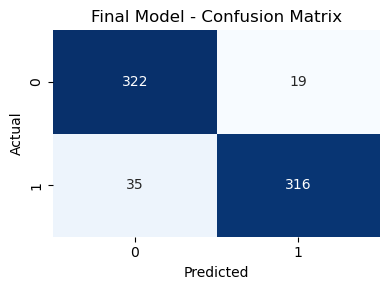

(0.9219653179190751,
 0.9432835820895522,
 0.9002849002849003,
 0.9212827988338192,
 None)

In [75]:
from sklearn.svm import SVC

model = SVC( kernel='rbf', C=1.0, gamma='scale', random_state=42)

# fit/train the model
model.fit(X_train, y_train)

# now make some predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

#  evaluate
print(" SVM Results:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
evaluate_final_model(model, X_test, y_test, model_name="Final Model")

# ADA BOOST CLASSIFIER

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train acc: 1.0
Val acc: 0.9566
Test acc: 0.9639

Final Model Results
Accuracy  : 0.9639
Precision : 0.9657
Recall    : 0.9630
F1 Score  : 0.9643
ROC AUC   : 0.9860


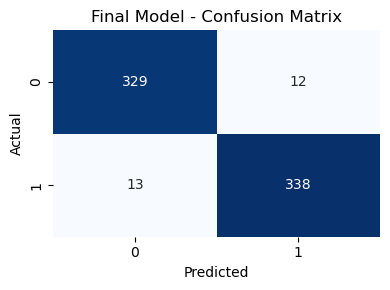

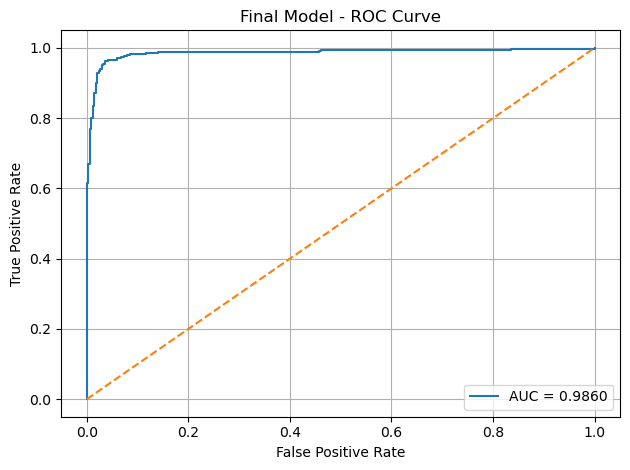

(0.9638728323699421,
 0.9657142857142857,
 0.9629629629629629,
 0.9643366619115549,
 0.9860390505551797)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

base = DecisionTreeClassifier(max_depth=2, random_state=42)

model = AdaBoostClassifier(
    estimator=base, 
 
    n_estimators=100,
    learning_rate=0.5,
    random_state=42)

model.fit(X_train, y_train)

preds_train = model.predict(X_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)

train_acc = accuracy_score(y_train, preds_train)
val_acc = accuracy_score(y_val, preds_val)
test_acc = accuracy_score(y_test, preds_test)

print("Train acc:", round(train_acc, 4))
print("Val acc:", round(val_acc, 4))
print("Test acc:", round(test_acc, 4))
evaluate_final_model(model, X_test, y_test, model_name="Final Model")

# Saving Model(Best Model)

In [19]:
import pickle
import os

# Assuming 'adaboost_model' is your final trained model for EC
# and 'features_we_keep_ec' is the list of top 20 features for EC
#
# Let's say your feature list for EC looked like this:
# features_we_keep_ec = ['Cz_beta', 'T6_delta', 'Fp2_alpha', ...]

# Create a dictionary to store both the model and its features
ec_package = {
    'model': model,
    'features': features_we_keep
}

# Save the package as a single .pkl file
if not os.path.exists('models'):
    os.makedirs('models')
    
with open('models/adaboost_model_EC.pkl', 'wb') as file:
    pickle.dump(ec_package, file)

print("AdaBoost model for Eye Close (EC) and its features saved successfully.")

AdaBoost model for Eye Close (EC) and its features saved successfully.


# Saving Relevant Plots

In [9]:
from sklearn.metrics import roc_auc_score
import pickle
import os
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

results = {
    "y_test": y_test,
    "y_pred": y_pred,
    "y_score": y_score
}

pickle.dump(results, open("models/ec_results.pkl", "wb"))   # for EC


# USING KNN CLASSIFIER

Train acc: 0.9716
Val acc: 0.9566
Test acc: 0.9422

Final Model Results
Accuracy  : 0.9422
Precision : 0.9430
Recall    : 0.9430
F1 Score  : 0.9430
ROC AUC   : 0.9768


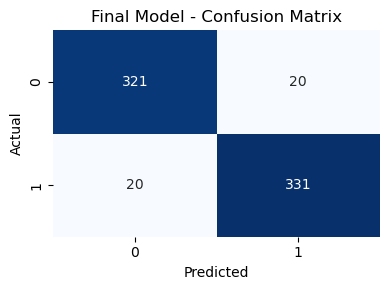

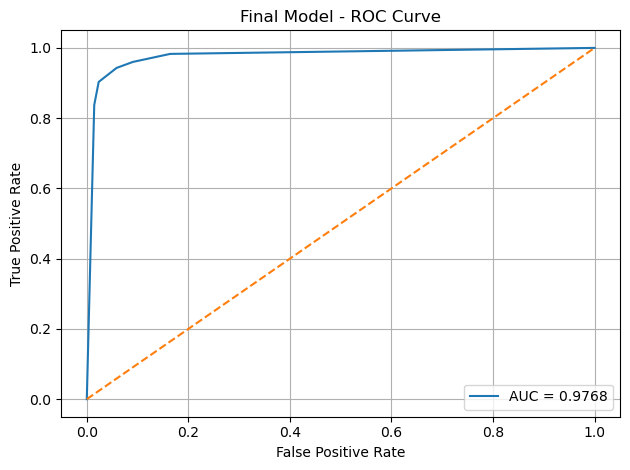

(0.9421965317919075,
 0.9430199430199431,
 0.9430199430199431,
 0.9430199430199431,
 0.9768361865136059)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform'
)

model.fit(X_train, y_train)

preds_train = model.predict(X_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)

train_acc = accuracy_score(y_train, preds_train)
val_acc = accuracy_score(y_val, preds_val)
test_acc = accuracy_score(y_test, preds_test)

print("Train acc:", round(train_acc, 4))
print("Val acc:", round(val_acc, 4))
print("Test acc:", round(test_acc, 4))
evaluate_final_model(model, X_test, y_test, model_name="Final Model")

# FOR SUBJECT INDEPENDENT FEATURES

Fold 1


C:\Users\hp\AppData\Local\Temp\ipykernel_13964\3929002194.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5.7711527e-03 1.6732515e-03 9.1655627e-03 4.2159981e-03 2.6629837e-02
 2.1086447e-03 8.7676127e-04 4.1488511e-03 5.3307591e-03 4.1604461e-03
 6.7906464e-03 2.2974629e-03 1.3981790e-04 2.6526186e-03 3.2485717e-03
 8.3952667e-03 5.7231565e-04 1.4088715e-02 1.5550456e-03 3.2661564e-03
 8.2098553e-03 1.4859539e-03 1.0103920e-03 8.4921429e-03 1.0641800e-03
 2.0243826e-03 3.0130679e-03 3.1892755e-03 0.0000000e+00 1.0459192e-02
 2.7285367e-03 4.2996956e-03 2.4518063e-02 1.6654129e-03 3.6702771e-03
 4.2684819e-03 5.5208551e-03 9.9109793e-03 0.0000000e+00 3.2448285e-04
 3.0518032e-03 3.5634735e-03 1.9300120e-02 2.2456483e-03 4.9595921e-03
 1.3565410e-02 8.2500995e-04 1.3905023e-03 1.3297432e-03 2.9637259e-03
 1.1293060e-03 3.4099335e-03 8.8842883e-04 7.3323981e-03 2.1683866e-02
 3.3514972e-03 2.8131481e-02 2.63298

Fold 2


C:\Users\hp\AppData\Local\Temp\ipykernel_13964\3929002194.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00437861 0.00325986 0.00741727 0.         0.01662821 0.00245416
 0.00914007 0.00377297 0.00316558 0.00570605 0.00412687 0.00346805
 0.00567811 0.00183015 0.00266837 0.00582034 0.00279494 0.00514303
 0.         0.00104988 0.00292842 0.00113821 0.00078927 0.00861577
 0.00325316 0.00891091 0.00459034 0.0041847  0.0044646  0.00116382
 0.         0.00137037 0.01807978 0.00424092 0.00245342 0.00986541
 0.01593499 0.0042788  0.         0.00062058 0.00520099 0.02765249
 0.00497894 0.00149823 0.00689761 0.03429569 0.00845292 0.01491043
 0.00200779 0.01213783 0.00568832 0.00522121 0.00079244 0.00342123
 0.00085779 0.00440457 0.03356715 0.00293691 0.0127423  0.12813172
 0.00285521 0.00230293 0.03769625 0.00361214 0.0033373  0.01127434
 0.01896965 0.01122845 0.14554736 0.00782424 0.00354895 0.00393166
 0.00472263 0

Fold 3


C:\Users\hp\AppData\Local\Temp\ipykernel_13964\3929002194.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00271702 0.00324608 0.00188807 0.01253862 0.01874292 0.00916167
 0.0024339  0.00575565 0.00516424 0.00530497 0.00374965 0.00308962
 0.00667685 0.00092362 0.00273717 0.01220289 0.         0.00625613
 0.00951438 0.00058263 0.01197541 0.00179239 0.00124269 0.00256112
 0.00118792 0.00585377 0.00457065 0.00075724 0.00870129 0.00604639
 0.01449826 0.00242114 0.0210843  0.00060763 0.00339132 0.
 0.01465339 0.00885075 0.         0.00203856 0.00201774 0.00908373
 0.00126892 0.00060131 0.00706739 0.02986025 0.00107946 0.00590591
 0.00630899 0.0051154  0.00035031 0.00469785 0.00112193 0.00761262
 0.00701521 0.00173801 0.00297915 0.00307875 0.0323685  0.05269237
 0.00523335 0.00223351 0.04705667 0.00310728 0.00194688 0.0104671
 0.00338559 0.00595542 0.21531713 0.01534104 0.00406287 0.00902412
 0.00497429 0.0046382 

Fold 4


C:\Users\hp\AppData\Local\Temp\ipykernel_13964\3929002194.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00546698 0.00266881 0.00386222 0.00109451 0.01223305 0.00377581
 0.00832443 0.01124725 0.00264781 0.00402577 0.00945769 0.00349591
 0.00472085 0.00053152 0.00139435 0.00648425 0.         0.00389233
 0.001597   0.00217196 0.05698268 0.01382327 0.00446397 0.00476058
 0.00394898 0.00439047 0.00237778 0.00753296 0.00320861 0.01070196
 0.00182769 0.00297788 0.00480747 0.         0.00525159 0.00753855
 0.01081038 0.00369812 0.         0.00119495 0.00685652 0.00246484
 0.02003289 0.00167501 0.00848705 0.01671555 0.00141073 0.00027004
 0.00779612 0.00147296 0.00944699 0.00110534 0.00379738 0.00662176
 0.00939444 0.00140424 0.00215414 0.0024258  0.01073104 0.07453561
 0.00267335 0.002095   0.08097371 0.00348244 0.00347838 0.01870917
 0.00939788 0.01227235 0.13557713 0.01958987 0.00501777 0.00099562
 0.0066565  0

Fold 5


C:\Users\hp\AppData\Local\Temp\ipykernel_13964\3929002194.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01234692 0.00465977 0.00122436 0.00198014 0.02201214 0.00370029
 0.01489967 0.00611635 0.00389117 0.00372834 0.00394031 0.00613071
 0.00187915 0.00059303 0.01466106 0.00658513 0.00279768 0.01157524
 0.00219308 0.00578253 0.00489202 0.01057573 0.00365475 0.01652658
 0.00215326 0.00561274 0.00312805 0.00481221 0.00264265 0.00820854
 0.04714768 0.00390851 0.00569894 0.00052339 0.00506691 0.00176669
 0.01545925 0.00564331 0.00396214 0.00090005 0.0018534  0.00144618
 0.00291308 0.00162877 0.01084104 0.02724161 0.00140714 0.00140942
 0.00137656 0.00160603 0.00117282 0.00415928 0.00040724 0.00579395
 0.00069134 0.00072005 0.01808611 0.00273651 0.02429362 0.13284536
 0.00357204 0.00447358 0.11930932 0.00122501 0.         0.01237485
 0.00970937 0.00984506 0.06641793 0.014681   0.00989313 0.00654826
 0.01110689 0

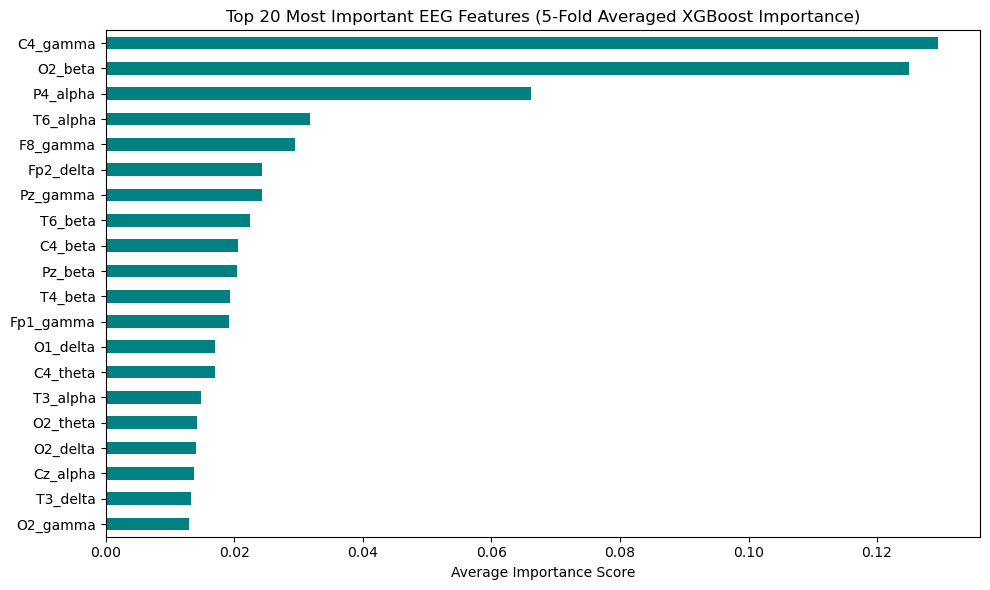


Top 20 EEG Features Averaged Across Folds:
 C4_gamma     0.129525
O2_beta      0.124966
P4_alpha     0.066139
T6_alpha     0.031759
F8_gamma     0.029445
Fp2_delta    0.024336
Pz_gamma     0.024302
T6_beta      0.022386
C4_beta      0.020611
Pz_beta      0.020380
T4_beta      0.019367
Fp1_gamma    0.019249
O1_delta     0.016998
C4_theta     0.016984
T3_alpha     0.014838
O2_theta     0.014290
O2_delta     0.014115
Cz_alpha     0.013790
T3_delta     0.013240
O2_gamma     0.012955
dtype: float32


In [7]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Load dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv")
X = df.drop(columns=['label', 'subject_id'])
y = df['label'].values

# Setup Stratified 5-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
feature_scores = pd.DataFrame(0, index=X.columns, columns=range(5))

# Loop over folds
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = xgb.XGBClassifier(
        
        eval_metric="logloss",
        random_state=42
    )
    model.fit(X_train, y_train)
    
    importances = model.feature_importances_
    feature_scores.iloc[:, fold] = importances

# Average feature importance across folds
mean_importance = feature_scores.mean(axis=1).sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
mean_importance.head(20).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 20 Most Important EEG Features (5-Fold Averaged XGBoost Importance)")
plt.xlabel("Average Importance Score")
plt.tight_layout()
plt.show()

# Print top features
top_features = mean_importance.head(20)
print("\nTop 20 EEG Features Averaged Across Folds:\n", top_features)

# EC DATA LOAD AND SPLIT

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PROJECT_IIITNR\final_csv_dataset(EC).csv")

# Features and labels
features_we_keep = [
    "C4_gamma","O2_beta","P4_alpha","T6_alpha",
    "F8_gamma","Fp2_delta","Pz_gamma","T6_beta",
    "C4_beta","Pz_beta","T4_beta","Fp1_gamma",
    "O1_delta","C4_theta","T3_alpha","O2_theta",
    "O2_delta","Cz_alpha","T3_delta","O2_gamma"
]
X = df[features_we_keep].values
y = df['label'].values
groups = df['subject_id'].values

# Step 1: Split into train+val and test (20% hold-out test)
X_temp, X_test, y_temp, y_test, groups_temp, groups_test = train_test_split(
    X, y, groups, test_size=0.2, stratify=y, random_state=42
)

# Step 2: 5-fold CV on the training set
gkf = GroupKFold(n_splits=5)
train_accuracies = []
val_accuracies = []

# USING XG BOOST CLASSIFIER


--- Fold 1 ---
Training Accuracy: 0.997
Validation Accuracy: 0.959

--- Fold 2 ---
Training Accuracy: 0.998
Validation Accuracy: 0.959

--- Fold 3 ---
Training Accuracy: 0.997
Validation Accuracy: 0.977

--- Fold 4 ---
Training Accuracy: 0.999
Validation Accuracy: 0.790

--- Fold 5 ---
Training Accuracy: 0.999
Validation Accuracy: 0.802

Final Model Results
Accuracy  : 0.9509
Precision : 0.9760
Recall    : 0.9259
F1 Score  : 0.9503
ROC AUC   : 0.9837


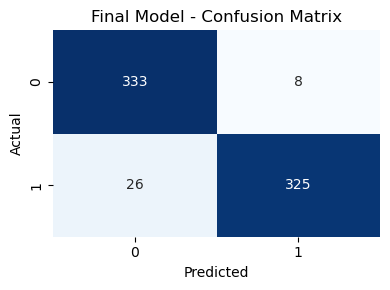

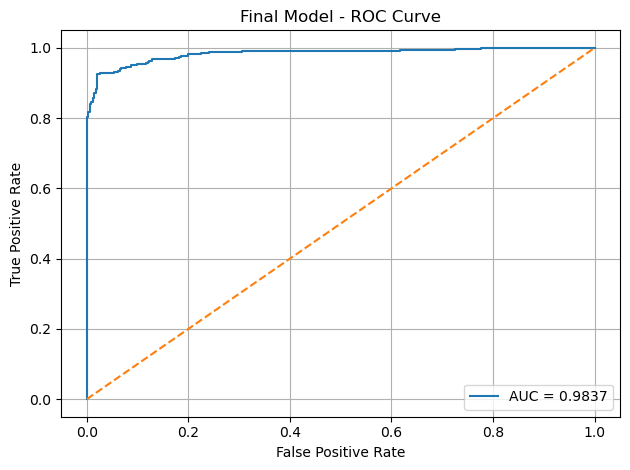


Performance Summary
-------------------
Average training accuracy:   0.998
Average validation accuracy: 0.897
Test accuracy:               0.951


In [17]:
fold = 1
for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
    model.fit(X_train, y_train)

    # Training Accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation Accuracy
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# ADA BOOST CLASSIFIER


--- Fold 1 ---


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.988
Validation Accuracy: 0.941

--- Fold 2 ---


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.992
Validation Accuracy: 0.906

--- Fold 3 ---


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.987
Validation Accuracy: 0.956

--- Fold 4 ---


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 1.000
Validation Accuracy: 0.789

--- Fold 5 ---


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.998
Validation Accuracy: 0.814

Final Model Results
Accuracy  : 0.9335
Precision : 0.9635
Recall    : 0.9031
F1 Score  : 0.9324
ROC AUC   : 0.9601


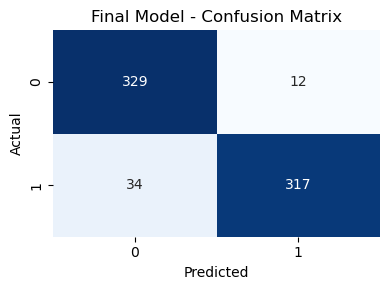

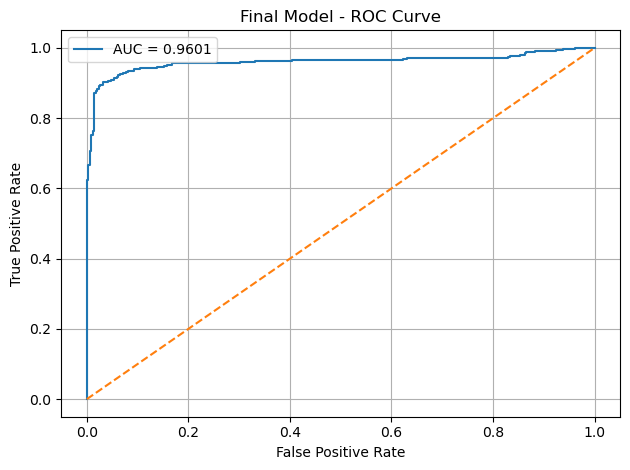


Performance Summary
-------------------
Average training accuracy:   0.993
Average validation accuracy: 0.881
Test accuracy:               0.934


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

train_accuracies = []
val_accuracies = []
fold = 1

for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    base = DecisionTreeClassifier(max_depth=1, random_state=42)

    model = AdaBoostClassifier(
        estimator=base,  
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# USING RANDOM FOREST CLASSIFIER


--- Fold 1 ---
Training Accuracy: 0.996
Validation Accuracy: 0.961

--- Fold 2 ---
Training Accuracy: 0.996
Validation Accuracy: 0.968

--- Fold 3 ---
Training Accuracy: 0.995
Validation Accuracy: 0.965

--- Fold 4 ---
Training Accuracy: 0.997
Validation Accuracy: 0.799

--- Fold 5 ---
Training Accuracy: 0.996
Validation Accuracy: 0.775

Final Model Results
Accuracy  : 0.9436
Precision : 0.9699
Recall    : 0.9174
F1 Score  : 0.9429
ROC AUC   : 0.9860


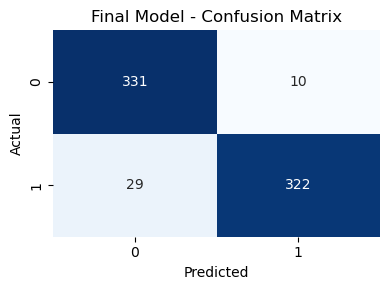

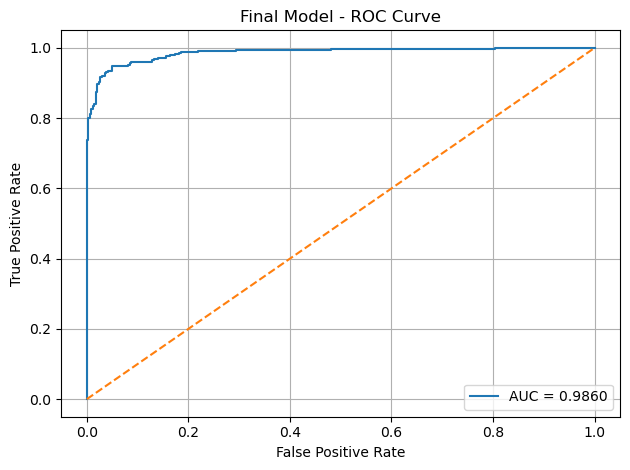


Performance Summary
-------------------
Average training accuracy:   0.996
Average validation accuracy: 0.894
Test accuracy:               0.944


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

train_accuracies = []
val_accuracies = []
fold = 1

for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    # Fine-tuned Random Forest parameters
    model = RandomForestClassifier(
        n_estimators=200,         
        max_depth=10,              
        min_samples_split=4,      
        min_samples_leaf=2,
        max_features='sqrt',       
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # Training performance
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation performance
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# USING SVM MODEL


--- Fold 1 ---
Training Accuracy: 0.995
Validation Accuracy: 0.948

--- Fold 2 ---
Training Accuracy: 0.998
Validation Accuracy: 0.932

--- Fold 3 ---
Training Accuracy: 0.995
Validation Accuracy: 0.939

--- Fold 4 ---
Training Accuracy: 0.999
Validation Accuracy: 0.792

--- Fold 5 ---
Training Accuracy: 0.998
Validation Accuracy: 0.809

Final Model Results
Accuracy  : 0.9538
Precision : 0.9570
Recall    : 0.9516
F1 Score  : 0.9543
ROC AUC   : 0.9881


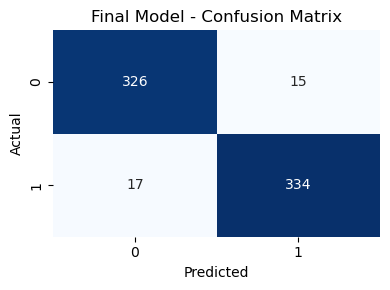

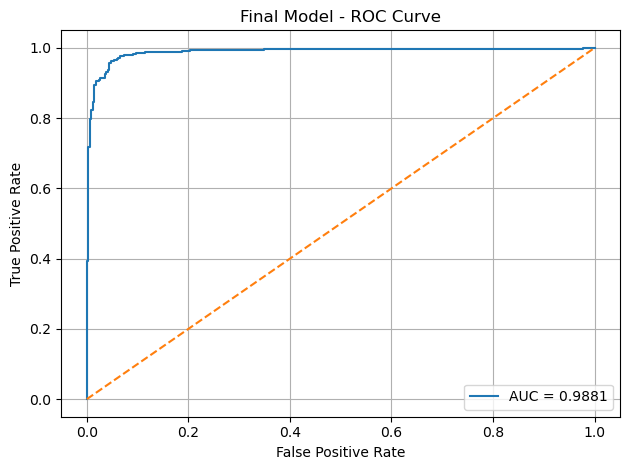


Performance Summary
-------------------
Average training accuracy:   0.997
Average validation accuracy: 0.884
Test accuracy:               0.954


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_accuracies = []
val_accuracies = []
fold = 1

for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    # SVM pipeline with StandardScaler
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(
            kernel='rbf',          
            C=10,                   
            gamma='scale',         
            probability=True,       
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)

    # Training performance
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation performance
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# USING LOGISTIC REGRESSION


--- Fold 1 ---
Training Accuracy: 0.924
Validation Accuracy: 0.961

--- Fold 2 ---
Training Accuracy: 0.925
Validation Accuracy: 0.906

--- Fold 3 ---
Training Accuracy: 0.921
Validation Accuracy: 0.958

--- Fold 4 ---
Training Accuracy: 0.967
Validation Accuracy: 0.764

--- Fold 5 ---
Training Accuracy: 0.956
Validation Accuracy: 0.782

Final Model Results
Accuracy  : 0.9075
Precision : 0.9335
Recall    : 0.8803
F1 Score  : 0.9062
ROC AUC   : 0.9582


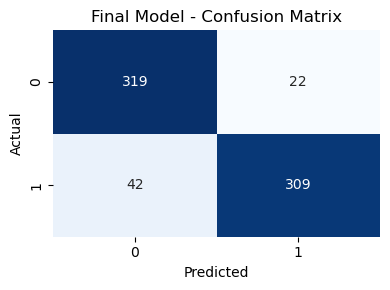

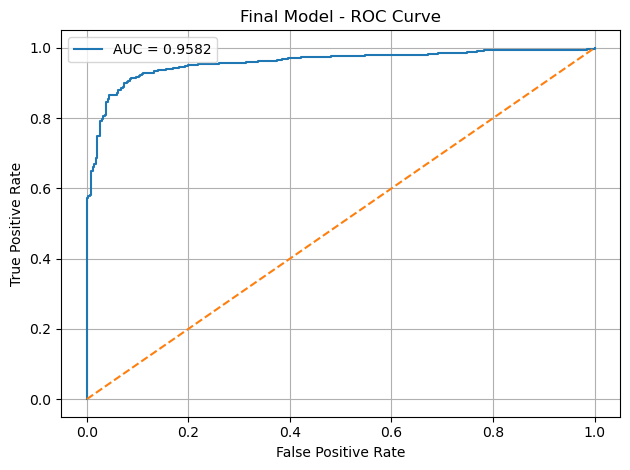


Performance Summary
-------------------
Average training accuracy:   0.939
Average validation accuracy: 0.874
Test accuracy:               0.908


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_accuracies = []
val_accuracies = []
fold = 1

for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    # Logistic Regression pipeline with feature scaling
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            penalty='l2',            
            C=1.0,                   
            solver='lbfgs',          
            max_iter=1000,           
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation accuracy
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# USING KNN CLASSIFIER


--- Fold 1 ---
Training Accuracy: 0.985
Validation Accuracy: 0.942

--- Fold 2 ---
Training Accuracy: 0.988
Validation Accuracy: 0.930

--- Fold 3 ---
Training Accuracy: 0.989
Validation Accuracy: 0.975

--- Fold 4 ---
Training Accuracy: 0.992
Validation Accuracy: 0.776

--- Fold 5 ---
Training Accuracy: 0.989
Validation Accuracy: 0.818

Final Model Results
Accuracy  : 0.9494
Precision : 0.9759
Recall    : 0.9231
F1 Score  : 0.9488
ROC AUC   : 0.9764


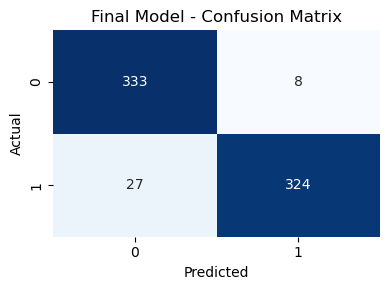

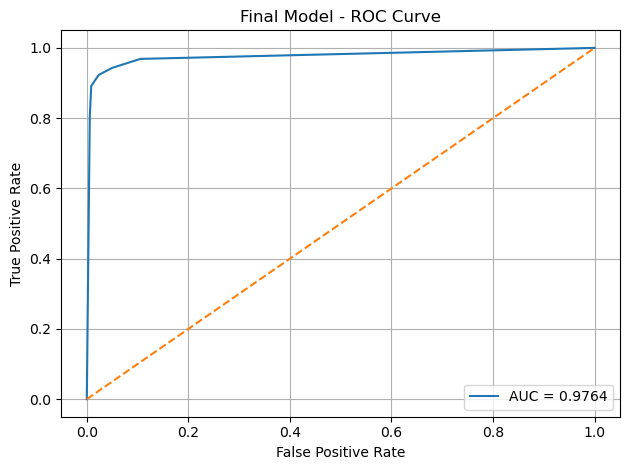


Performance Summary
-------------------
Average training accuracy:   0.988
Average validation accuracy: 0.889
Test accuracy:               0.949


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_accuracies = []
val_accuracies = []
fold = 1

# Create pipeline with scaling + KNN
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

for train_idx, val_idx in gkf.split(X_temp, y_temp, groups=groups_temp):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_temp[train_idx], X_temp[val_idx]
    y_train, y_val = y_temp[train_idx], y_temp[val_idx]

    model.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Validation accuracy
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)

    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Validation Accuracy: {val_acc:.3f}")
    fold += 1
evaluate_final_model(model, X_test, y_test, model_name="Final Model")
show_performance(model, X_test, y_test, train_accuracies, val_accuracies)

# SUBJECT DEPENDENT VS SUBJECT INDEPENDENT FEATURES

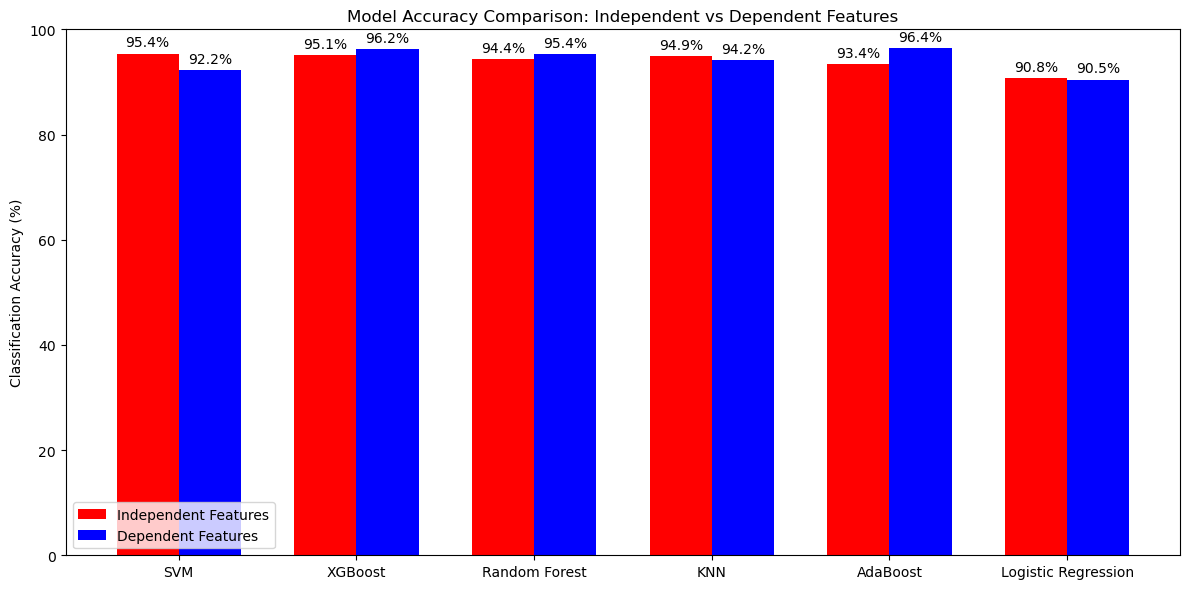

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['SVM', 'XGBoost', 'Random Forest', 'KNN', 'AdaBoost', 'Logistic Regression']

# Placeholder accuracy values 
# Format: [SVM, XGBoost, Random Forest, KNN, AdaBoost, Logistic Regression]
acc_independent = [ 95.4, 95.1, 94.4,94.9, 93.4,90.8]  # Red bars
acc_dependent = [92.19, 96.24, 95.37 , 94.22, 96.39, 90.46]  # Blue bars

# Set position of bar groups
x = np.arange(len(models))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x - width/2, acc_independent, width, color='red', label='Independent Features')
bars2 = ax.bar(x + width/2, acc_dependent, width, color='blue', label='Dependent Features')

# Labels and titles
ax.set_ylabel('Classification Accuracy (%)')
ax.set_title('Model Accuracy Comparison: Independent vs Dependent Features')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 100)
ax.legend()

# Display accuracy labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()
